In [23]:
import seaborn as sns
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd 

plt.style.use('ggplot')

In [5]:
df = pd.read_csv('Downloads/employee_attrition_final.csv')

In [6]:
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Performance_Rating,Education_Level,Work_Life_Balance,Commute_Time,Overtime_Hours,Attrition
0,0,60.0,Male,HR,HR Specialist,29,0.211,201.0,0,61742.0,2.11,Bachelor's,3,10,19,1
1,1,50.0,Female,Engineering,Engineer,14,0.139,230.0,0,84731.0,1.39,Master's,2,47,23,1
2,2,36.0,Female,Sales,Manager,23,0.944,113.0,0,81754.0,9.44,Master's,5,38,0,1
3,3,64.0,Male,Sales,Manager,4,0.701,148.0,1,91752.0,9.01,Master's,5,28,0,0
4,4,29.0,Male,Sales,Accountant,21,0.119,250.0,0,71118.0,1.19,Bachelor's,2,34,27,0


In [9]:
# rows and columns number
rows, columns = df.shape
print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")

Total Rows: 100000
Total Columns: 16


In [46]:
#Data Information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Employee_ID            100000 non-null  int64  
 1   Age                    99920 non-null   float64
 2   Gender                 100000 non-null  object 
 3   Department             100000 non-null  object 
 4   Job_Title              100000 non-null  object 
 5   Years_at_Company       100000 non-null  int64  
 6   Satisfaction_Level     99927 non-null   float64
 7   Average_Monthly_Hours  99932 non-null   float64
 8   Promotion_Last_5Years  100000 non-null  int64  
 9   Salary                 99926 non-null   float64
 10  Performance_Rating     99927 non-null   float64
 11  Education_Level        100000 non-null  object 
 12  Work_Life_Balance      100000 non-null  int64  
 13  Commute_Time           100000 non-null  int64  
 14  Overtime_Hours         100000 non-nul

In [47]:
#Descrube our data
df.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Performance_Rating,Work_Life_Balance,Commute_Time,Overtime_Hours,Attrition
count,100000.000000,99920.000000,100000.000000,99927.000000,99932.000000,100000.000000,99926.000000,99927.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,49999.500000,43.033036,19.537580,0.550149,199.479166,0.149350,89976.445380,5.767138,3.269390,30.49021,9.655190,0.399650
std,28867.657797,12.379026,11.524505,0.259453,57.771421,0.356435,34677.335354,2.631672,1.665835,12.19404,10.553557,0.489829
min,0.000000,22.000000,0.000000,0.100000,100.000000,0.000000,30004.000000,1.000000,1.000000,10.00000,0.000000,0.000000
25%,24999.750000,32.000000,10.000000,0.325000,149.000000,0.000000,59924.250000,3.540000,2.000000,20.00000,0.000000,0.000000
50%,49999.500000,43.000000,20.000000,0.551000,200.000000,0.000000,89873.000000,5.810000,4.000000,30.00000,0.000000,0.000000
75%,74999.250000,54.000000,30.000000,0.774000,249.000000,0.000000,120100.000000,8.050000,5.000000,39.00000,19.000000,1.000000
max,99999.000000,64.000000,39.000000,1.000000,299.000000,1.000000,149999.000000,10.000000,5.000000,59.00000,29.000000,1.000000


In [16]:
# Initialize inconsistencies dictionary
inconsistencies = {}

# 1. Numeric Range Checks
print("=== Numeric Inconsistencies ===")
for check, condition in [
    ("Age < 18 or > 100", (df['Age'] < 18) | (df['Age'] > 100)),
    ("Years_at_Company < 0 or > 50", (df['Years_at_Company'] < 0) | (df['Years_at_Company'] > 50)),
    ("Satisfaction_Level < 0 or > 1", (df['Satisfaction_Level'] < 0) | (df['Satisfaction_Level'] > 1)),
    ("Average_Monthly_Hours < 0 or > 744", (df['Average_Monthly_Hours'] < 0) | (df['Average_Monthly_Hours'] > 744)),
    ("Overtime_Hours < 0 or > 100", (df['Overtime_Hours'] < 0) | (df['Overtime_Hours'] > 100)),
    ("Salary <= 0", df['Salary'] <= 0),
    ("Performance_Rating < 0 or > 10", (df['Performance_Rating'] < 0) | (df['Performance_Rating'] > 10)),
    ("Work_Life_Balance < 1 or > 5", (df['Work_Life_Balance'] < 1) | (df['Work_Life_Balance'] > 5)),
    ("Commute_Time < 0 or > 180", (df['Commute_Time'] < 0) | (df['Commute_Time'] > 180)),
    ("Promotion_Last_5Years not 0 or 1", ~df['Promotion_Last_5Years'].isin([0, 1])),
    ("Attrition not 0 or 1", ~df['Attrition'].isin([0, 1]))
]:
    count = df[condition].shape[0]
    inconsistencies[check] = count
    print(f"{check:<40} : {count:>5} rows")

# 2. Duplicate Rows
print("\n=== Duplicate Rows ===")
duplicates = df.duplicated().sum()
print(f"Duplicate Rows                          : {duplicates:>5} rows")

# 3. Logical Consistency Check
print("\n=== Logical Inconsistencies ===")
inconsistencies['Age - Years_at_Company < 16'] = df[df['Age'] - df['Years_at_Company'] < 16].shape[0]
print(f"Age - Years_at_Company < 16            : {inconsistencies['Age - Years_at_Company < 16']:>5} rows")

# 4. Text Column Checks
print("\n=== Text Column Inconsistencies ===")
print(f"Gender Unique Values                   : {list(df['Gender'].unique())}")
inconsistencies['Gender not Male or Female'] = df[~df['Gender'].isin(['Male', 'Female'])].shape[0]
print(f"Gender not 'Male' or 'Female'          : {inconsistencies['Gender not Male or Female']:>5} rows")
inconsistencies['Department Empty'] = df[df['Department'].isna() | (df['Department'] == '')].shape[0]
print(f"Department empty or NaN                : {inconsistencies['Department Empty']:>5} rows")
inconsistencies['Job_Title Empty'] = df[df['Job_Title'].isna() | (df['Job_Title'] == '')].shape[0]
print(f"Job_Title empty or NaN                 : {inconsistencies['Job_Title Empty']:>5} rows")
inconsistencies['Education_Level Empty'] = df[df['Education_Level'].isna() | (df['Education_Level'] == '')].shape[0]
print(f"Education_Level empty or NaN           : {inconsistencies['Education_Level Empty']:>5} rows")

# Total Inconsistencies
total_inconsistencies = sum(inconsistencies.values()) + duplicates
print(f"\n=== Summary ===")
print(f"Total Inconsistencies Found            : {total_inconsistencies:>5} rows")

# Sample of Logical Inconsistencies
print("\n=== Sample of Logical Inconsistencies (Age - Years_at_Company < 16) ===")
sample = df[df['Age'] - df['Years_at_Company'] < 16][['Age', 'Years_at_Company']].head()
print("Index | Age  | Years_at_Company")
print("------|------|-----------------")
for idx, row in sample.iterrows():
    print(f"{idx:<5} | {row['Age']:>4.1f} | {row['Years_at_Company']:>15}")


=== Numeric Inconsistencies ===
Age < 18 or > 100                        :     0 rows
Years_at_Company < 0 or > 50             :     0 rows
Satisfaction_Level < 0 or > 1            :     0 rows
Average_Monthly_Hours < 0 or > 744       :     0 rows
Overtime_Hours < 0 or > 100              :     0 rows
Salary <= 0                              :     0 rows
Performance_Rating < 0 or > 10           :     0 rows
Work_Life_Balance < 1 or > 5             :     0 rows
Commute_Time < 0 or > 180                :     0 rows
Promotion_Last_5Years not 0 or 1         :     0 rows
Attrition not 0 or 1                     :     0 rows

=== Duplicate Rows ===
Duplicate Rows                          :     0 rows

=== Logical Inconsistencies ===
Age - Years_at_Company < 16            : 32431 rows

=== Text Column Inconsistencies ===
Gender Unique Values                   : ['Male', 'Female']
Gender not 'Male' or 'Female'          :     0 rows
Department empty or NaN                :     0 rows
Job_Title e

In [19]:
# Check for missing values in all columns
print("=== Missing Values in Cleaned Data ===")
missing_values = df.isnull().sum()
for col in missing_values.index:
    print(f"{col:<25} : {missing_values[col]:>5} rows")

# Total missing values
total_missing = missing_values.sum()
print(f"\n=== Summary ===")
print(f"Total Missing Values Found : {total_missing:>5} rows")

=== Missing Values in Cleaned Data ===
Employee_ID               :     0 rows
Age                       :    80 rows
Gender                    :     0 rows
Department                :     0 rows
Job_Title                 :     0 rows
Years_at_Company          :     0 rows
Satisfaction_Level        :    73 rows
Average_Monthly_Hours     :    68 rows
Promotion_Last_5Years     :     0 rows
Salary                    :    74 rows
Performance_Rating        :    73 rows
Education_Level           :     0 rows
Work_Life_Balance         :     0 rows
Commute_Time              :     0 rows
Overtime_Hours            :     0 rows
Attrition                 :     0 rows

=== Summary ===
Total Missing Values Found :   368 rows


/tmp/ipykernel_3993/1852425439.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


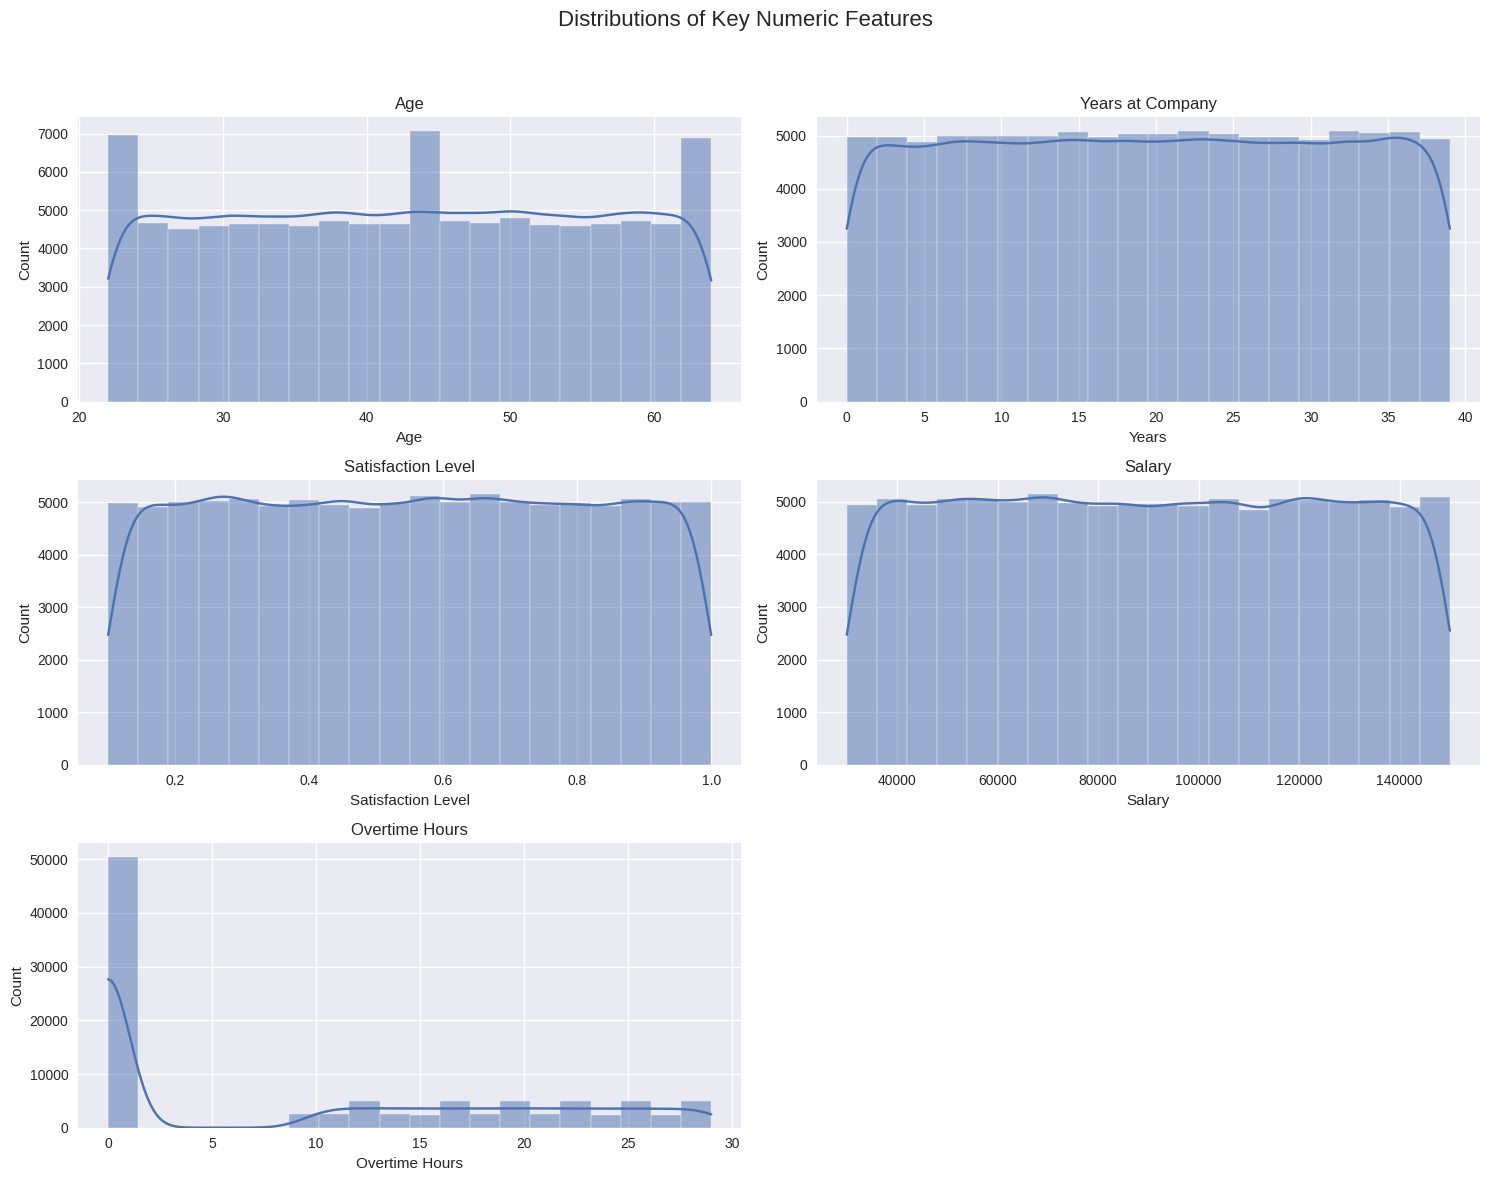

In [36]:
# Set plot style and display options
plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 16)

# 1. Histograms for Numeric Columns (including Overtime_Hours)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # Changed to 3x2 for 5 plots
fig.suptitle('Distributions of Key Numeric Features', fontsize=16)

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

sns.histplot(df['Years_at_Company'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Years at Company')
axes[0, 1].set_xlabel('Years')
axes[0, 1].set_ylabel('Count')

sns.histplot(df['Satisfaction_Level'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Satisfaction Level')
axes[1, 0].set_xlabel('Satisfaction Level')
axes[1, 0].set_ylabel('Count')

sns.histplot(df['Salary'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Salary')
axes[1, 1].set_xlabel('Salary')
axes[1, 1].set_ylabel('Count')

sns.histplot(df['Overtime_Hours'], bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Overtime Hours')
axes[2, 0].set_xlabel('Overtime Hours')
axes[2, 0].set_ylabel('Count')

# Leave bottom-right slot empty for balance
axes[2, 1].axis('off')  # Hides the unused subplot

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

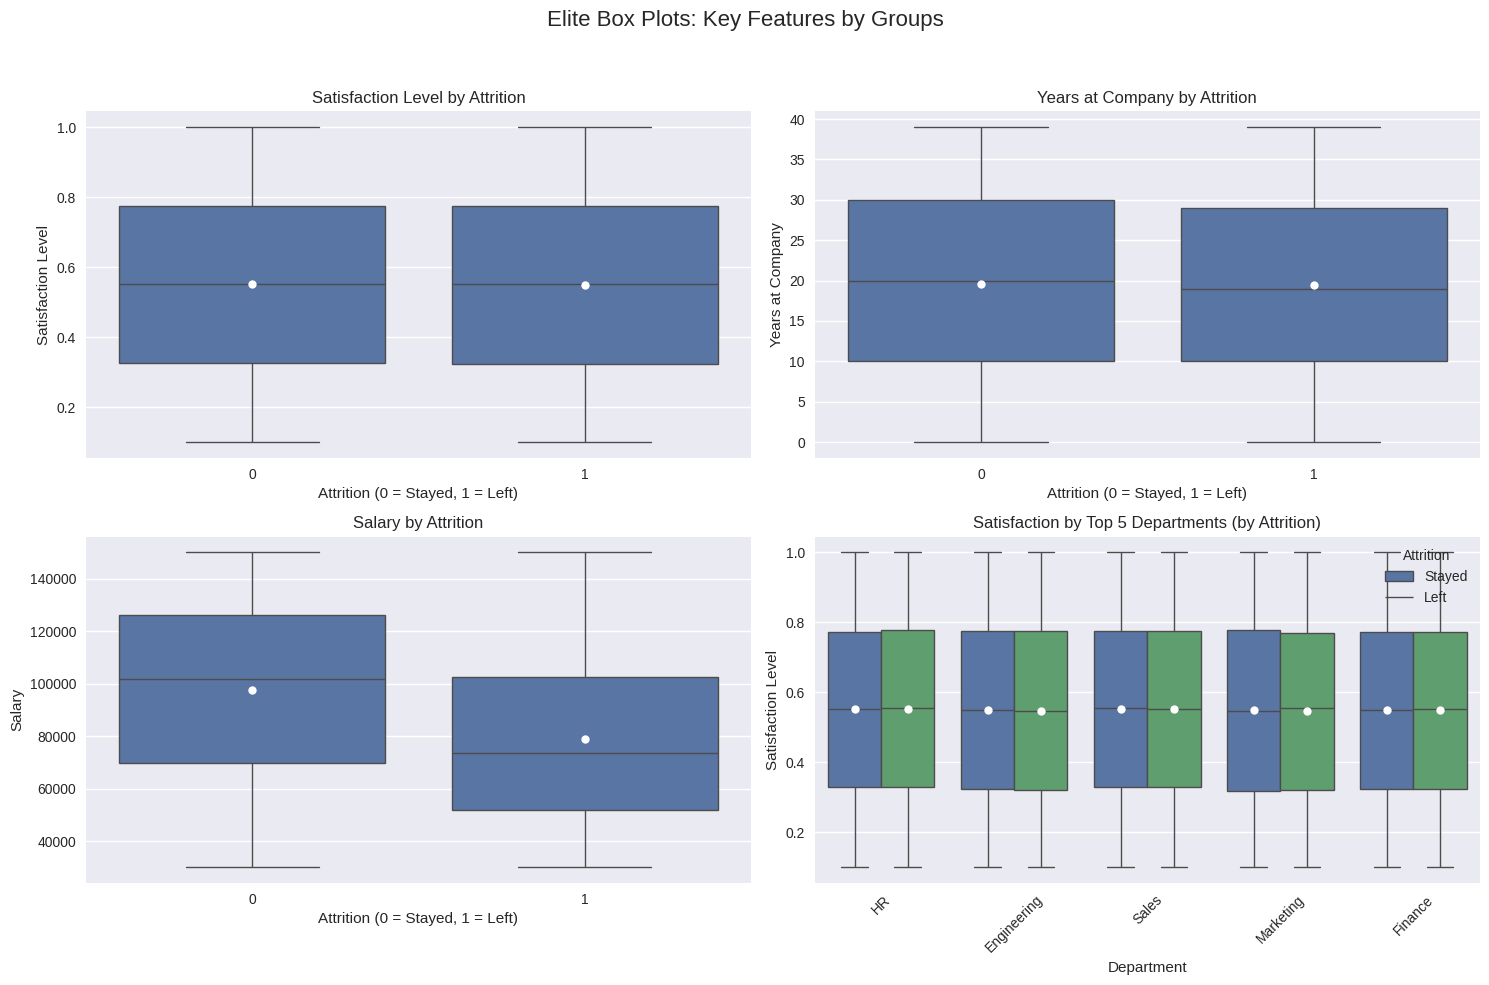

In [39]:
# 2. Elite Box Plots in 2x2 Grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Elite Box Plots: Key Features by Groups', fontsize=16)

# Satisfaction_Level by Attrition
sns.boxplot(x='Attrition', y='Satisfaction_Level', data=df, ax=axes[0, 0], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
axes[0, 0].set_title('Satisfaction Level by Attrition')
axes[0, 0].set_xlabel('Attrition (0 = Stayed, 1 = Left)')
axes[0, 0].set_ylabel('Satisfaction Level')

# Years_at_Company by Attrition
sns.boxplot(x='Attrition', y='Years_at_Company', data=df, ax=axes[0, 1], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
axes[0, 1].set_title('Years at Company by Attrition')
axes[0, 1].set_xlabel('Attrition (0 = Stayed, 1 = Left)')
axes[0, 1].set_ylabel('Years at Company')

# Salary by Attrition
sns.boxplot(x='Attrition', y='Salary', data=df, ax=axes[1, 0], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
axes[1, 0].set_title('Salary by Attrition')
axes[1, 0].set_xlabel('Attrition (0 = Stayed, 1 = Left)')
axes[1, 0].set_ylabel('Salary')

# Satisfaction_Level by Top 5 Departments, Colored by Attrition
top_depts = df['Department'].value_counts().index[:5]
sns.boxplot(x='Department', y='Satisfaction_Level', hue='Attrition', data=df[df['Department'].isin(top_depts)], ax=axes[1, 1], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
axes[1, 1].set_title('Satisfaction by Top 5 Departments (by Attrition)')
axes[1, 1].set_xlabel('Department')
axes[1, 1].set_ylabel('Satisfaction Level')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Attrition', labels=['Stayed', 'Left'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

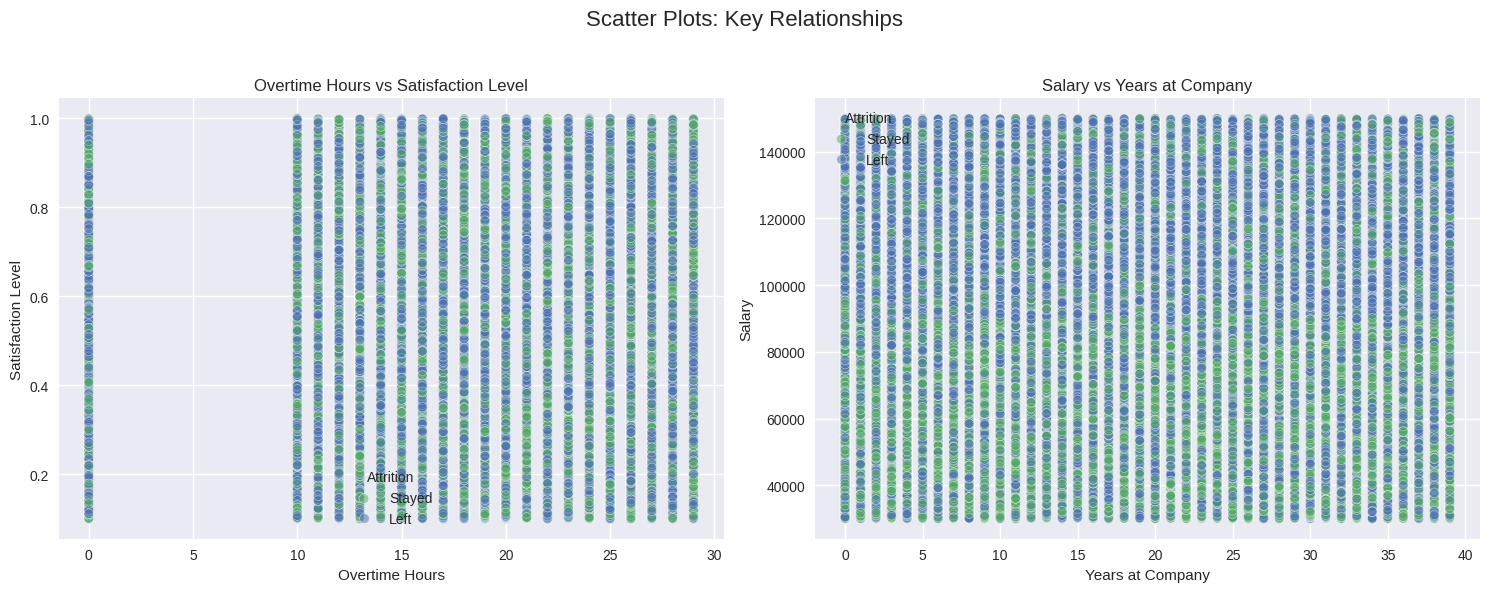

In [41]:
# 3. Scatter Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Scatter Plots: Key Relationships', fontsize=16)

sns.scatterplot(x='Overtime_Hours', y='Satisfaction_Level', hue='Attrition', data=df, alpha=0.5, ax=ax1)
ax1.set_title('Overtime Hours vs Satisfaction Level')
ax1.set_xlabel('Overtime Hours')
ax1.set_ylabel('Satisfaction Level')
ax1.legend(title='Attrition', labels=['Stayed', 'Left'])

sns.scatterplot(x='Years_at_Company', y='Salary', hue='Attrition', data=df, alpha=0.5, ax=ax2)
ax2.set_title('Salary vs Years at Company')
ax2.set_xlabel('Years at Company')
ax2.set_ylabel('Salary')
ax2.legend(title='Attrition', labels=['Stayed', 'Left'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

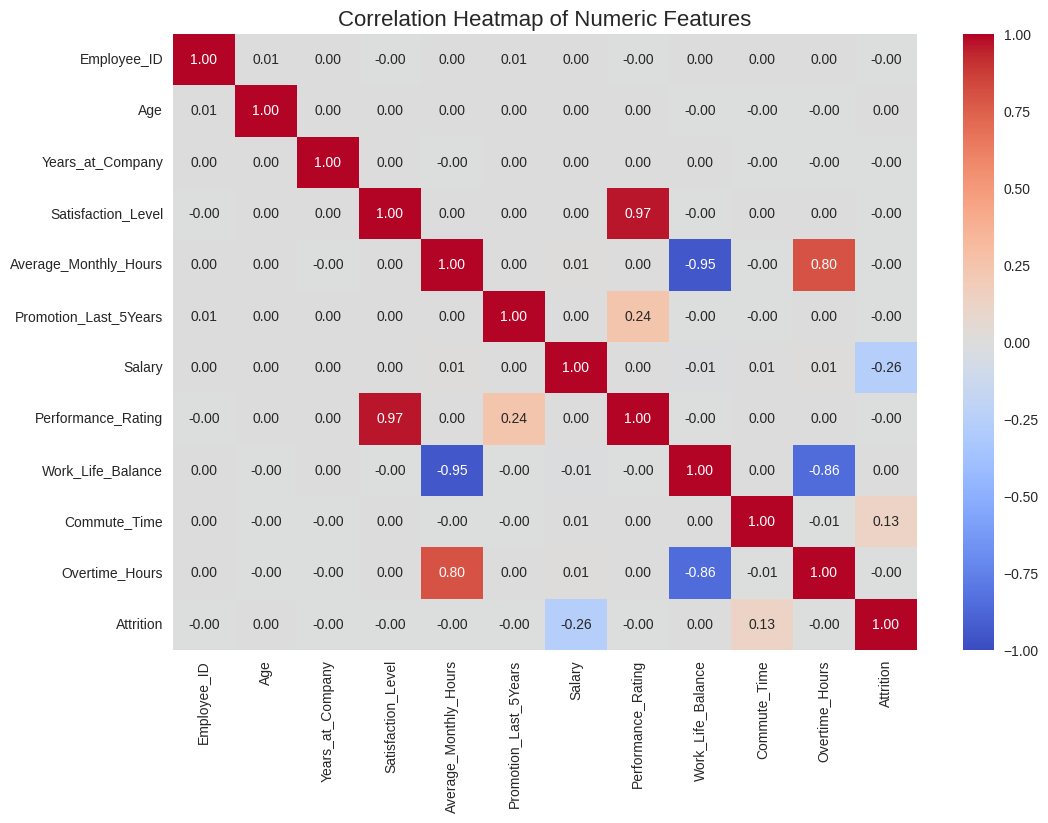

In [42]:
# 4. Heatmap for Correlations
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

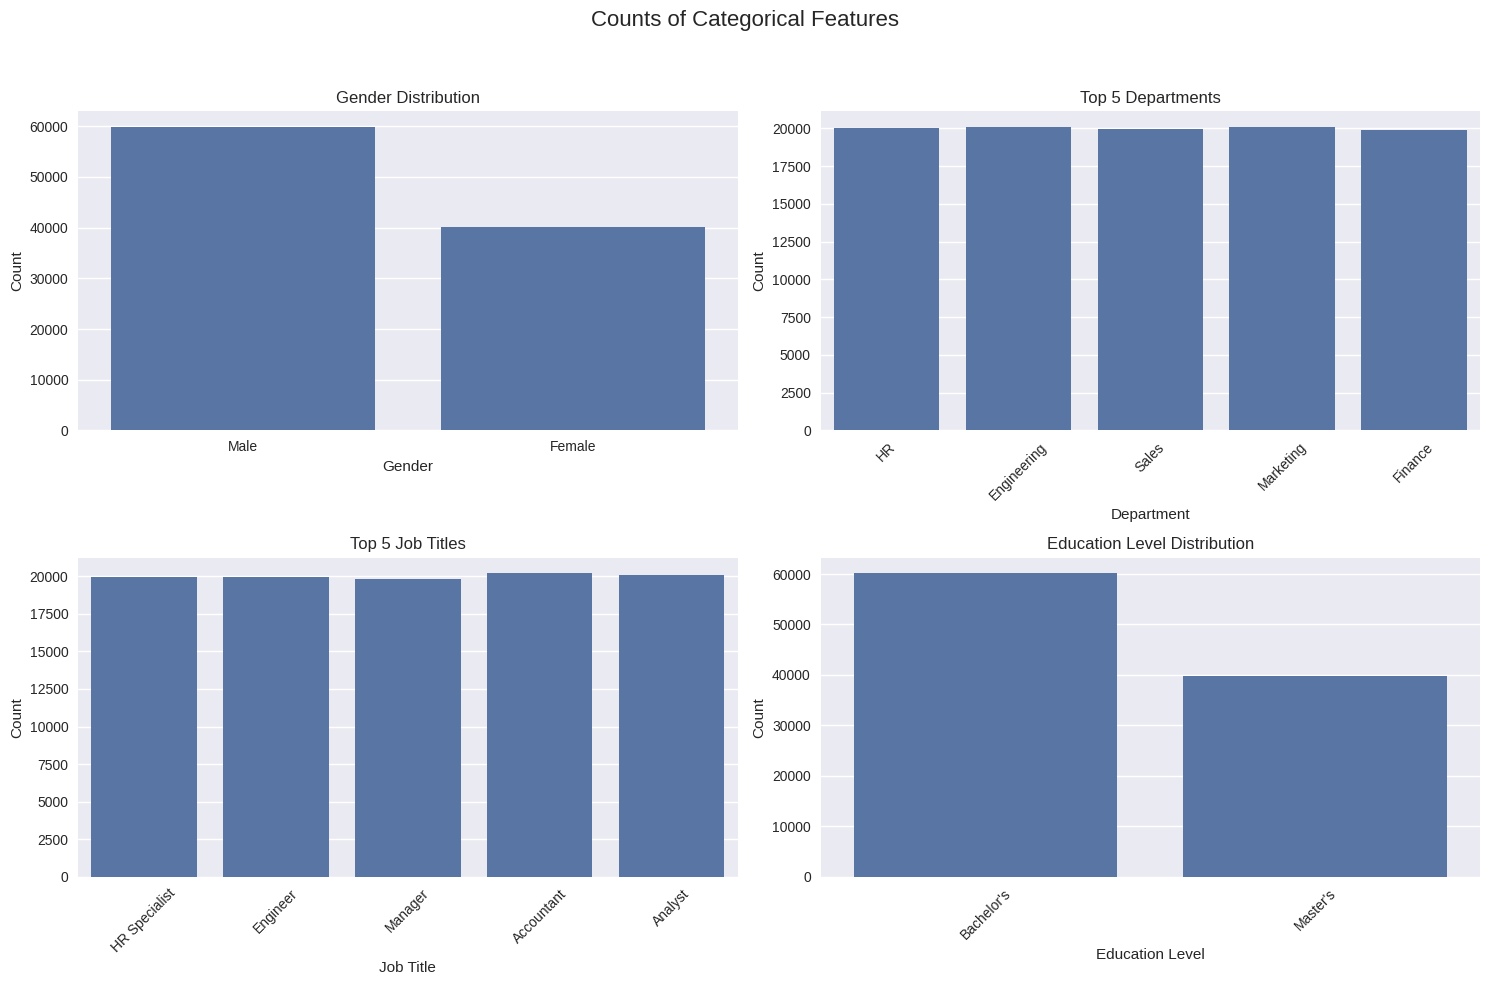

In [43]:
# 5. Bar Plots for Text Columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Counts of Categorical Features', fontsize=16)

sns.countplot(x='Gender', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

top_depts = df['Department'].value_counts().index[:5]
sns.countplot(x='Department', data=df[df['Department'].isin(top_depts)], ax=axes[0, 1])
axes[0, 1].set_title('Top 5 Departments')
axes[0, 1].set_xlabel('Department')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

top_jobs = df['Job_Title'].value_counts().index[:5]
sns.countplot(x='Job_Title', data=df[df['Job_Title'].isin(top_jobs)], ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Job Titles')
axes[1, 0].set_xlabel('Job Title')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='Education_Level', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Education Level Distribution')
axes[1, 1].set_xlabel('Education Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()